In [22]:
import pandas as pd
import pickle as pkl
import shap
from sklearn.metrics import mean_squared_error

In [8]:
rf_results = pd.read_csv('../_data/full_data_with_predictions_rf.csv')
gbm_results = pd.read_csv('../_data/full_data_with_predictions_gbm.csv')
xgb_results = pd.read_csv('../_data/full_data_with_predictions_xgboost.csv')

In [9]:
print(f'RMSE for Random Forest: {mean_squared_error(rf_results.percent_vaccinated_log, rf_results.prediction, squared=True)}')
print(f'RMSE for GBM: {mean_squared_error(gbm_results.percent_vaccinated_log, gbm_results.prediction, squared=True)}')
print(f'RMSE for XGBoost: {mean_squared_error(xgb_results.percent_vaccinated_log, xgb_results.prediction, squared=True)}')

RMSE for Random Forest: 0.02024194670611329
RMSE for GBM: 0.01897206394186399
RMSE for XGBoost: 0.022079091528842267


In [10]:
# Analyze results only for the best model
with open('../_data/model_gbm.pkl', 'rb') as f:
    gbm_model = pkl.load(f)

Trying to unpickle estimator DecisionTreeRegressor from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator DummyRegressor from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator GradientBoostingRegressor from version 1.4.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [ ]:
# Add information about the type of municipality to the data frame (1 = urban, 2 = rural, 3 = mixed urban-rural)
def muncipality_type_conditional(x):
    if x == '1':
        return 'urban'
    elif x == '2':
        return 'rural'
    else:
        return 'mixed_urban_rural'

gbm_results['municipality_type'] = gbm_results['municipality_code'].map(lambda x: muncipality_type_conditional(str(x)[-1]))

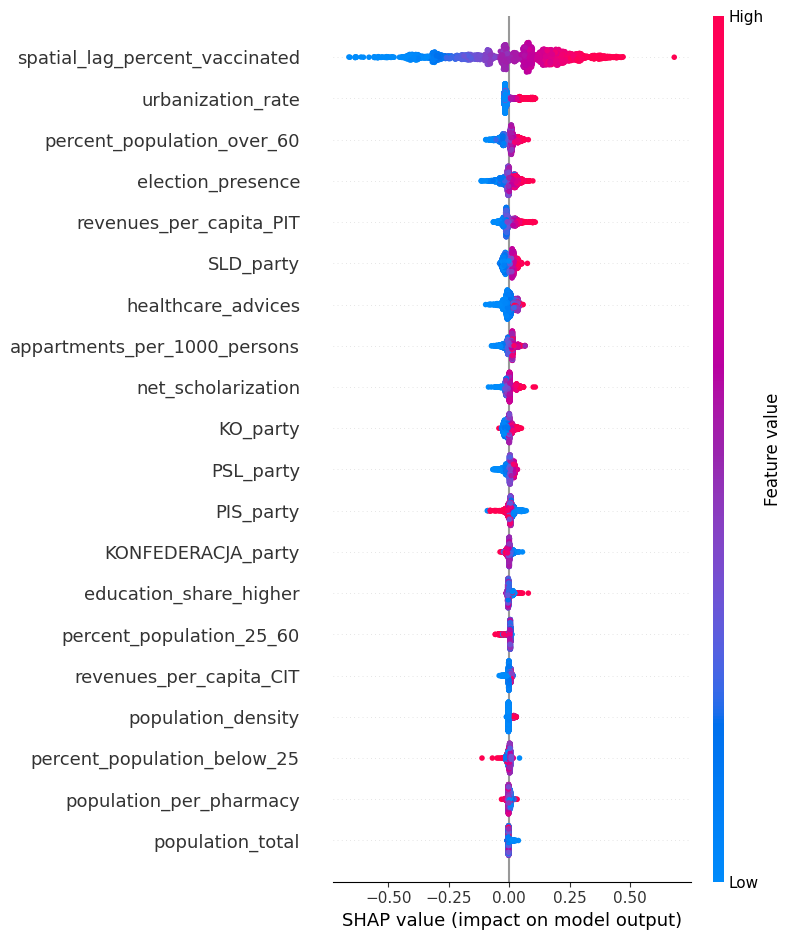

In [23]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(gbm_model)

filtered_df = gbm_results.drop(columns=['percent_vaccinated_log', 'prediction'])
shap_values = explainer.shap_values(filtered_df)

shap.summary_plot(shap_values, filtered_df)

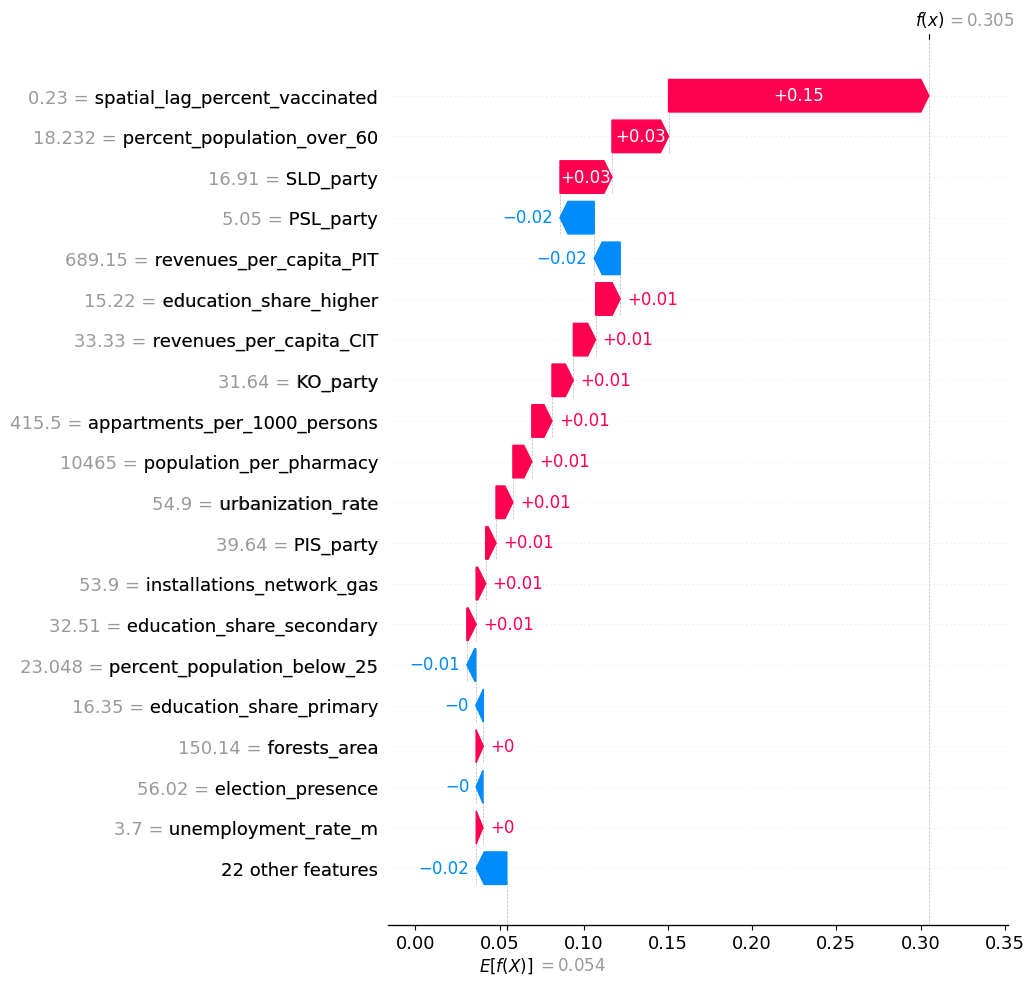

In [40]:
# background_data = shap.utils.sample(filtered_df, 100)
# explainer = shap.Explainer(gbm_model.predict, background_data)
# shap_values = explainer(filtered_df)
i=40

shap.waterfall_plot(shap.Explanation(values=shap_values[i], base_values=explainer.expected_value, data=filtered_df.iloc[i]), max_display=20)

In [52]:

# Zakładając, że masz już shap_values, explainer i filtered_df

# Pusta lista na wyniki
shap_df_list = []

# Pętla po każdym wierszu w filtered_df
for i in range(len(filtered_df)):
    # Obliczenie atrybutów SHAP dla i-tego wiersza
    shap_values_i = shap.Explanation(values=shap_values[i], base_values=explainer.expected_value, data=filtered_df.iloc[i]).values
    
    # Dodanie atrybutów SHAP do listy
    shap_df_list.append(shap_values_i)
    
# Utworzenie ramki danych z listy wyników
shap_df = pd.DataFrame(shap_df_list, columns = shap.Explanation(values=shap_values[i], base_values=explainer.expected_value, data=filtered_df.iloc[i]).data.index)

# Wyświetlenie ramki danych z atrybutami SHAP
print(shap_df)
shap.Explanation(values=shap_values[i], base_values=explainer.expected_value, data=filtered_df.iloc[i]).data.index


shap_df.to_csv(r'..\\_data\shap_df.csv', index=False)

      population_total  population_total_m  population_total_f  area_km2  \
0            -0.002920           -0.002932           -0.001792  0.001584   
1            -0.003517           -0.001287            0.000246 -0.006222   
2            -0.000884           -0.002772            0.003299 -0.004353   
3            -0.003274           -0.002075            0.000206 -0.002780   
4            -0.003454           -0.001193            0.000140  0.008892   
...                ...                 ...                 ...       ...   
2472         -0.005197           -0.001194            0.000277 -0.006349   
2473         -0.002528           -0.002942           -0.001996  0.000448   
2474         -0.003340           -0.002594           -0.002105 -0.000212   
2475         -0.003043           -0.001117           -0.002595  0.000491   
2476         -0.003374           -0.007806           -0.002019  0.004397   

      population_density  urbanization_rate  healthcare_advices  \
0               0.01

In [27]:
fig, ax = shap.partial_dependence_plot(
    "",
    gbm_model.predict,
    gbm_results.drop(columns=['prediction', 
                              'county_name', 
                              'county_code', 
                              'voivodeship',  
                              'municipality_name',
                              'municipality_code_str',
                              'percent_vaccinated_log']),
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

KeyError: "['county_name', 'county_code', 'voivodeship', 'municipality_name', 'municipality_code_str'] not found in axis"